## Import Packages and Data

In [185]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import math
import numpy as np

In [186]:
# Import necessary files

shapefile_path = 'us_hex_islands_alphabetized/us_hex_islands1.shp'
gdf = gpd.read_file(shapefile_path)

csv_path = 'Mapping Data.csv'
df = pd.read_csv(csv_path)

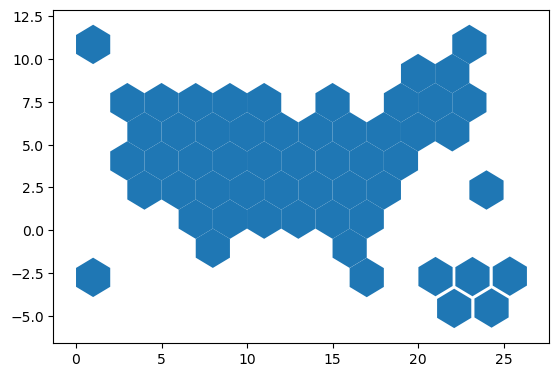

In [187]:
# Plot original file for context

gdf.plot()
plt.show()

## Modify Data

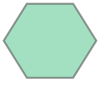

In [188]:
def generate_polygon(cx,cy):
    '''
    Generates a hexagon given an x-coordinate and a y-coordinate.

    Args:
        cx: a given x-coordinate
        cy: a given y-coordinate
    Returns:
        a Polygon object based on the vertices of a hexagon with (cx, cy) as
        its centroid
    '''
    cx = float(cx)
    cy = float(cy)
    half_width = 0.625
    half_height = 0.5

    horizontal_distance = half_width / 2

    vertices = [
        (cx - half_width, cy), # Leftmost
        (cx - horizontal_distance, cy + half_height),  # Top left
        (cx + horizontal_distance, cy + half_height),  # Top right
        (cx + half_width, cy),  # Rightmost
        (cx + horizontal_distance, cy - half_height),  # Bottom right
        (cx - horizontal_distance, cy - half_height),  # Bottom left
    ]

    polygon = Polygon(vertices)
    return polygon

generate_polygon(5, 5)

In [189]:
# Creates a new dataframe that contains corresponding Polygon objects for each
# state. Additionally, a GeoPandas dataframe is created.

with_polygons = df.assign(
    geometry=df.apply(lambda row: generate_polygon(row['X-Coordinate'],
                                                   row['Y-Coordinate']),
                                                   axis=1)

)

gdf = gpd.GeoDataFrame(with_polygons)
gdf.head()

,Unnamed: 0,State,Abbreviation,Region,X-Coordinate,Y-Coordinate,geometry
0,0,Washington,WA,WRO,0.625,8.0,"POLYGON ((0.00000 8.00000, 0.31250 8.50000, 0...."
1,1,Montana,MT,MPRO,2.500,8.0,"POLYGON ((1.87500 8.00000, 2.18750 8.50000, 2...."
2,2,North Dakota,ND,MPRO,4.375,8.0,"POLYGON ((3.75000 8.00000, 4.06250 8.50000, 4...."
3,3,Minnesota,MN,MWRO,6.250,8.0,"POLYGON ((5.62500 8.00000, 5.93750 8.50000, 6...."
4,4,Wisconsin,WI,MWRO,8.125,8.0,"POLYGON ((7.50000 8.00000, 7.81250 8.50000, 8...."


## Plot Modified Data

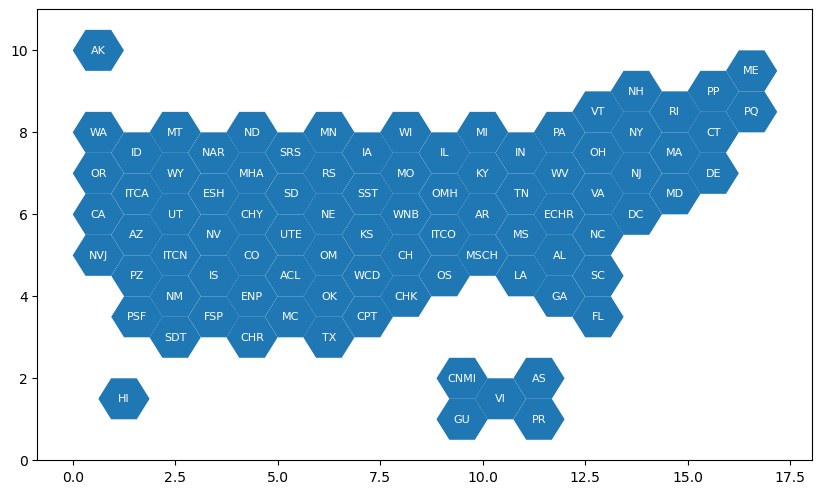

In [190]:
# Plots the data in gdf

gdf.plot(figsize=[10, 10])

for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    label = row['Abbreviation']

    plt.text(centroid.x, centroid.y, label, fontsize=8, ha='center',
             va='center',color='white')

plt.show()

## Save to SHP File

In [193]:
# Commented out to prevent double-saving. Saves gdf to a shp file.

# output_filename = 'new_hexbin_map.shp'

# gdf.to_file(output_filename)

/var/folders/qr/w5ttj5rx0db4c_6xh_gzhnh40000gn/T/ipykernel_27573/1511575896.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_filename)


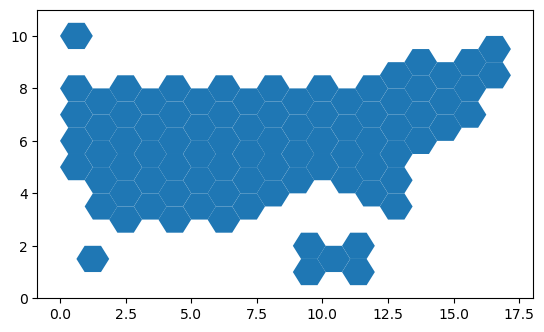

In [195]:
# Tests the generated shp file to make sure saving worked correctly.

test_shapefile_path = 'new_hexbin_map/new_hexbin_map.shp'
test_gdf = gpd.read_file(test_shapefile_path)

test_gdf.plot()
plt.show()